In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/challenges-in-representation-learning-facial-expression-recognition-challenge/icml_face_data.csv
/kaggle/input/challenges-in-representation-learning-facial-expression-recognition-challenge/fer2013.tar.gz
/kaggle/input/challenges-in-representation-learning-facial-expression-recognition-challenge/example_submission.csv
/kaggle/input/challenges-in-representation-learning-facial-expression-recognition-challenge/train.csv
/kaggle/input/challenges-in-representation-learning-facial-expression-recognition-challenge/test.csv


**LOAD DATA**

In [2]:
train_data = pd.read_csv("/kaggle/input/challenges-in-representation-learning-facial-expression-recognition-challenge/train.csv")
train_data.head(5)

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [3]:
train_data["emotion"].value_counts()

3    7215
6    4965
4    4830
2    4097
0    3995
5    3171
1     436
Name: emotion, dtype: int64

> 0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral)

In [94]:
test_data = pd.read_csv("/kaggle/input/challenges-in-representation-learning-facial-expression-recognition-challenge/test.csv")
test_data.head(5)

,pixels
0,254 254 254 254 254 249 255 160 2 58 53 70 77 ...
1,156 184 198 202 204 207 210 212 213 214 215 21...
2,69 118 61 60 96 121 103 87 103 88 70 90 115 12...
3,205 203 236 157 83 158 120 116 94 86 155 180 2...
4,87 79 74 66 74 96 77 80 80 84 83 89 102 91 84 ...


In [5]:
facialexpression_df = pd.read_csv('/kaggle/input/challenges-in-representation-learning-facial-expression-recognition-challenge/icml_face_data.csv')

In [6]:
facialexpression_df

,emotion,Usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
...,...,...,...
35882,6,PrivateTest,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...
35883,3,PrivateTest,178 174 172 173 181 188 191 194 196 199 200 20...
35884,0,PrivateTest,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...
35885,3,PrivateTest,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...


In [7]:
facialexpression_df[' pixels'][0]

'70 80 82 72 58 58 60 63 54 58 60 48 89 115 121 119 115 110 98 91 84 84 90 99 110 126 143 153 158 171 169 172 169 165 129 110 113 107 95 79 66 62 56 57 61 52 43 41 65 61 58 57 56 69 75 70 65 56 54 105 146 154 151 151 155 155 150 147 147 148 152 158 164 172 177 182 186 189 188 190 188 180 167 116 95 103 97 77 72 62 55 58 54 56 52 44 50 43 54 64 63 71 68 64 52 66 119 156 161 164 163 164 167 168 170 174 175 176 178 179 183 187 190 195 197 198 197 198 195 191 190 145 86 100 90 65 57 60 54 51 41 49 56 47 38 44 63 55 46 52 54 55 83 138 157 158 165 168 172 171 173 176 179 179 180 182 185 187 189 189 192 197 200 199 196 198 200 198 197 177 91 87 96 58 58 59 51 42 37 41 47 45 37 35 36 30 41 47 59 94 141 159 161 161 164 170 171 172 176 178 179 182 183 183 187 189 192 192 194 195 200 200 199 199 200 201 197 193 111 71 108 69 55 61 51 42 43 56 54 44 24 29 31 45 61 72 100 136 150 159 163 162 163 170 172 171 174 177 177 180 187 186 187 189 192 192 194 195 196 197 199 200 201 200 197 201 137 58 98 92

> HERE WE SEE THAT PIXELS ARE IN STRING FORMET WE HAVE TO CONVERT THEM INTO ARRAY FORMET

In [8]:
def string2array(x):
  return np.array(x.split(' ')).reshape(48, 48, 1).astype('float32')


> HERE WE CONVERT 48x48 Image To 96x96 Image

In [9]:
import cv2

In [10]:
def resize(x):
  
  img = x.reshape(48, 48)
  return cv2.resize(img, dsize=(96, 96), interpolation = cv2.INTER_CUBIC)

In [11]:
facialexpression_df[' pixels'] = facialexpression_df[' pixels'].apply(lambda x: string2array(x)) # Converted To Array
facialexpression_df[' pixels'] = facialexpression_df[' pixels'].apply(lambda x: resize(x)) # Resize To 96x96

In [12]:
facialexpression_df.head()

,emotion,Usage,pixels
0,0,Training,"[[69.316925, 73.03865, 79.13719, 84.17186, 85...."
1,0,Training,"[[151.09435, 150.91393, 150.65791, 148.96367, ..."
2,2,Training,"[[232.82553, 229.81886, 225.59953, 200.68909, ..."
3,4,Training,"[[23.061905, 25.50914, 29.47847, 33.99843, 36...."
4,6,Training,"[[4.771652, 3.3384705, 0.9779358, -0.45524597,..."


> Check For Null Data

In [13]:
facialexpression_df.isnull().sum()

emotion    0
 Usage     0
 pixels    0
dtype: int64

> Just Visualize One Image

In [14]:
import matplotlib.pyplot as plt

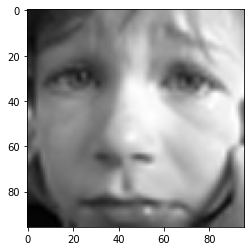

In [15]:
plt.imshow(facialexpression_df[' pixels'][6], cmap = 'gray')

Count How Many Emotions 

In [16]:
facialexpression_df.emotion.value_counts().index

Int64Index([3, 6, 4, 2, 0, 5, 1], dtype='int64')

In [17]:
facialexpression_df.emotion.value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

In [18]:
import seaborn as sns

<AxesSubplot:ylabel='emotion'>

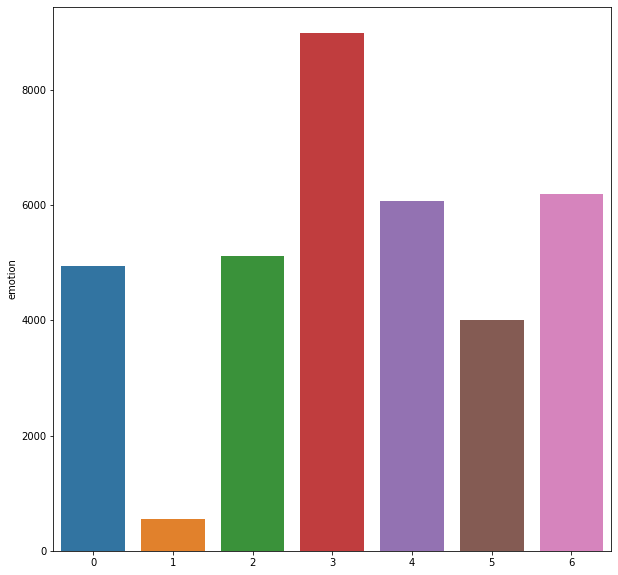

In [19]:
plt.figure(figsize = (10,10))
sns.barplot(x = facialexpression_df.emotion.value_counts().index, y = facialexpression_df.emotion.value_counts())

In [20]:
import tensorflow as tf

X = facialexpression_df[' pixels']
y = tf.keras.utils.to_categorical(facialexpression_df['emotion'])# Convert Into Categorical Because OF CNN Output

> X's Value In Pixels And Image

In [21]:
X[0]

array([[ 69.316925,  73.03865 ,  79.13719 , ...,  40.73619 ,  40.6584  ,
         40.5394  ],
       [ 68.66325 ,  70.95224 ,  74.71768 , ...,  43.274765,  42.037186,
         41.223618],
       [ 67.768814,  67.71646 ,  67.67172 , ...,  47.39473 ,  44.26329 ,
         42.31465 ],
       ...,
       [ 74.89021 ,  76.79553 ,  79.90259 , ...,  71.463425,  59.32875 ,
         51.74736 ],
       [ 76.68126 ,  75.808105,  74.25452 , ...,  93.943375,  79.77934 ,
         71.13246 ],
       [ 77.63858 ,  75.15074 ,  70.8846  , ..., 107.66351 ,  92.23212 ,
         82.91585 ]], dtype=float32)

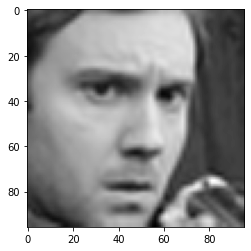

In [22]:
plt.imshow(X[0], cmap = 'gray')

> y's Value

In [23]:
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [24]:
X = np.stack(X, axis = 0)
X = X.reshape(35887, 96, 96,1)# 35887 Because Of 35887 No. Of Images

print(X.shape, y.shape)

(35887, 96, 96, 1) (35887, 7)


In [25]:
#X = np.repeat(X[..., np.newaxis], 3, -1)# For Gray-Scale To RGB Convert(1 Channel To 3 Channel Convert)

> Split X-y In To Train-Test And Validation Data

In [26]:

from sklearn.model_selection import train_test_split

X_train, X_Test, y_train, y_Test = train_test_split(X, y, test_size = 0.1, shuffle = True)
X_val, X_Test, y_val, y_Test = train_test_split(X_Test, y_Test, test_size = 0.5, shuffle = True)

> Normalize

In [27]:
X_train = X_train-127.5/127.5
X_val   = X_val-127.5 /127.5
X_Test  = X_Test-127.5/127.5

In [28]:
print(X_train[0],X_val[0],X_Test[0])

[[[151.51581 ]
  [152.23883 ]
  [153.90643 ]
  ...
  [ 83.52147 ]
  [ 82.56758 ]
  [ 82.0721  ]]

 [[151.76584 ]
  [150.42418 ]
  [148.68294 ]
  ...
  [ 82.77965 ]
  [ 82.28975 ]
  [ 82.076385]]

 [[152.37027 ]
  [147.69392 ]
  [140.44969 ]
  ...
  [ 81.697464]
  [ 81.93504 ]
  [ 82.16507 ]]

 ...

 [[ 56.370956]
  [ 56.55017 ]
  [ 56.830322]
  ...
  [ 66.41411 ]
  [ 65.149185]
  [ 64.32767 ]]

 [[ 55.39778 ]
  [ 55.423706]
  [ 55.453125]
  ...
  [ 66.367935]
  [ 64.798996]
  [ 63.793427]]

 [[ 54.800186]
  [ 54.73001 ]
  [ 54.60202 ]
  ...
  [ 66.33157 ]
  [ 64.57858 ]
  [ 63.461533]]] [[[254.      ]
  [254.      ]
  [254.      ]
  ...
  [254.      ]
  [254.      ]
  [254.      ]]

 [[254.      ]
  [254.      ]
  [254.      ]
  ...
  [254.      ]
  [254.      ]
  [254.      ]]

 [[254.      ]
  [254.      ]
  [254.      ]
  ...
  [254.      ]
  [254.      ]
  [254.      ]]

 ...

 [[154.579   ]
  [149.74052 ]
  [141.96559 ]
  ...
  [ 81.109375]
  [ 72.05237 ]
  [ 66.71385 ]]

 [[145.2

In [39]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.python.keras import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras import backend as K
from keras import optimizers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

> Create Training Data-Genrator

In [30]:
train_datagen = ImageDataGenerator(
    rotation_range = 15,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    fill_mode = "nearest")

> We Want To Use Xception Model For Transfer Lerning In This Compition But The Data Given Is Only in 1 Channel We Converted It Into 3 Channel And Start Trainng But The Acc. Is Low And The Memory Limit Is Exided So We Desided To Build The Model

In [31]:
'''

xception_model = Sequential()

pretrained_model= tf.keras.applications.Xception(include_top=False,
                   input_shape=(96,96,3),#Usally Is 299x299 But We Give It 96x96
                   pooling='avg',
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

xception_model.add(pretrained_model)
xception_model.add(Flatten())
xception_model.add(BatchNormalization())
xception_model.add(Dense(7, activation='softmax'))# For 7 Classes
xception_model.compile(loss'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

'''

"\n\nxception_model = Sequential()\n\npretrained_model= tf.keras.applications.Xception(include_top=False,\n                   input_shape=(96,96,3),#Usally Is 299x299 But We Give It 96x96\n                   pooling='avg',\n                   weights='imagenet')\nfor layer in pretrained_model.layers:\n        layer.trainable=False\n\nxception_model.add(pretrained_model)\nxception_model.add(Flatten())\nxception_model.add(BatchNormalization())\nxception_model.add(Dense(7, activation='softmax'))# For 7 Classes\nxception_model.compile(loss'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])\n\n"

> We Use Residual Blocks Here Like Resnet 

In [48]:
def res_block(X, filter):

  # Convolutional_block
  X_copy = X

  f1 , f2, f3 = filter

  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), kernel_initializer= glorot_uniform(seed = 0))(X)
  X = MaxPool2D((2,2))(X)
  X = BatchNormalization(axis =3,)(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3)(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3)(X)


  # Short path
  X_copy = Conv2D(f3, kernel_size = (1,1), strides =(1,1), kernel_initializer= glorot_uniform(seed = 0))(X_copy)
  X_copy = MaxPool2D((2,2))(X_copy)
  X_copy = BatchNormalization(axis =3)(X_copy)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Identity Block 1
  X_copy = X


  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3)(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3)(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1), kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3)(X)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Identity Block 2
  X_copy = X


  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3)(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3)(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1), kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3)(X)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  return X

In [49]:
input_shape = (96, 96, 1)

X_input = Input(input_shape)

X = ZeroPadding2D((3, 3))(X_input)

X = Conv2D(64, (7, 7), strides= (2, 2), kernel_initializer= glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis =3)(X)
X = Activation('relu')(X)
X = MaxPooling2D((3, 3), strides= (2, 2))(X)

X = res_block(X, filter= [64, 64, 256])

X = res_block(X, filter= [128, 128, 512])

X = AveragePooling2D((4, 4))(X)

X = Flatten()(X)
X = Dense(7, activation = 'softmax',kernel_initializer= glorot_uniform(seed=0))(X)

model = Model( inputs= X_input, outputs = X)

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Total params: 1,175,047
Trainable params: 1,166,471
Non-trainable params: 8,576
__________________________________________________________________________________________________


In [50]:
model.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [54]:
save = model.fit(train_datagen.flow(X_train, y_train, batch_size=100),
    validation_data=(X_val, y_val), steps_per_epoch=len(X_train) // 100,
    epochs= 20)

Epoch 1/20
322/322 [==============================] - 30s 93ms/step - loss: 1.7341 - accuracy: 0.2848 - val_loss: 1.7028 - val_accuracy: 0.3088
Epoch 2/20
322/322 [==============================] - 31s 96ms/step - loss: 1.6358 - accuracy: 0.3503 - val_loss: 1.5607 - val_accuracy: 0.3907
Epoch 3/20
322/322 [==============================] - 30s 92ms/step - loss: 1.5336 - accuracy: 0.4066 - val_loss: 1.4605 - val_accuracy: 0.4448
Epoch 4/20
322/322 [==============================] - 31s 95ms/step - loss: 1.4467 - accuracy: 0.4427 - val_loss: 1.3756 - val_accuracy: 0.4877
Epoch 5/20
322/322 [==============================] - 31s 95ms/step - loss: 1.3840 - accuracy: 0.4681 - val_loss: 1.2944 - val_accuracy: 0.5072
Epoch 6/20
322/322 [==============================] - 30s 93ms/step - loss: 1.3194 - accuracy: 0.4971 - val_loss: 1.2518 - val_accuracy: 0.5279
Epoch 7/20
322/322 [==============================] - 29s 91ms/step - loss: 1.2867 - accuracy: 0.5104 - val_loss: 1.2596 - val_accuracy:

In [55]:
score = model.evaluate(X_Test, y_Test)
print('Test Accuracy: {}'.format(score[1]))

57/57 [==============================] - 0s 7ms/step - loss: 1.1040 - accuracy: 0.5794
Test Accuracy: 0.5793871879577637


> Now This Is All For icml_face Data Now We Will Acctually Train For Train Data And Pridict For Test Data

In [58]:
train_data['pixels'] = train_data['pixels'].apply(lambda x: string2array(x)) # Converted To Array
train_data['pixels'] = train_data['pixels'].apply(lambda x: resize(x)) # Resize To 96x96

In [59]:
train_data.head()

,emotion,pixels
0,0,"[[69.316925, 73.03865, 79.13719, 84.17186, 85...."
1,0,"[[151.09435, 150.91393, 150.65791, 148.96367, ..."
2,2,"[[232.82553, 229.81886, 225.59953, 200.68909, ..."
3,4,"[[23.061905, 25.50914, 29.47847, 33.99843, 36...."
4,6,"[[4.771652, 3.3384705, 0.9779358, -0.45524597,..."


In [60]:
train_data.isnull().sum()#check For Null

emotion    0
pixels     0
dtype: int64

<AxesSubplot:ylabel='emotion'>

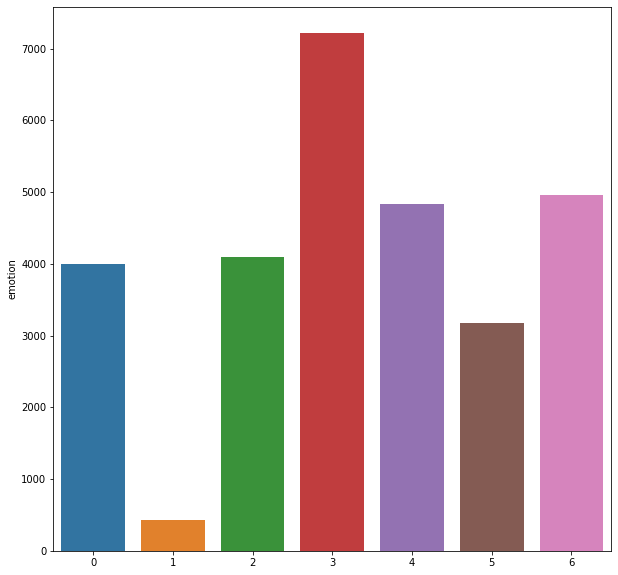

In [62]:
plt.figure(figsize = (10,10))
sns.barplot(x = train_data.emotion.value_counts().index, y = train_data.emotion.value_counts())

In [64]:
X = train_data['pixels']
y = tf.keras.utils.to_categorical(train_data['emotion'])# Convert Into Categorical Because OF CNN Output

In [65]:
X.shape

(28709,)

In [66]:
X = np.stack(X, axis = 0)
X = X.reshape(28709, 96, 96,1)# 28709 Because Of 28709 No. Of Images
print(X.shape, y.shape)

(28709, 96, 96, 1) (28709, 7)


In [67]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.1, shuffle = True)

In [70]:
X_train = X_train-127.5/127.5
X_val   = X_val-127.5 /127.5

In [71]:
save = model.fit(train_datagen.flow(X_train, y_train, batch_size=100),
    validation_data=(X_val, y_val), steps_per_epoch=len(X_train) // 100,
    epochs= 20)

Epoch 1/20
258/258 [==============================] - 26s 99ms/step - loss: 1.0798 - accuracy: 0.5919 - val_loss: 1.0682 - val_accuracy: 0.5991
Epoch 2/20
258/258 [==============================] - 24s 92ms/step - loss: 1.0717 - accuracy: 0.5930 - val_loss: 1.0916 - val_accuracy: 0.5827
Epoch 3/20
258/258 [==============================] - 25s 98ms/step - loss: 1.0615 - accuracy: 0.5984 - val_loss: 1.1131 - val_accuracy: 0.5873
Epoch 4/20
258/258 [==============================] - 24s 94ms/step - loss: 1.0533 - accuracy: 0.6003 - val_loss: 1.0664 - val_accuracy: 0.6088
Epoch 5/20
258/258 [==============================] - 25s 96ms/step - loss: 1.0479 - accuracy: 0.6047 - val_loss: 1.0370 - val_accuracy: 0.6123
Epoch 6/20
258/258 [==============================] - 24s 93ms/step - loss: 1.0411 - accuracy: 0.6061 - val_loss: 1.0761 - val_accuracy: 0.5921
Epoch 7/20
258/258 [==============================] - 25s 96ms/step - loss: 1.0322 - accuracy: 0.6078 - val_loss: 1.0605 - val_accuracy:

In [76]:
model.save_weights("weights.hdf5")

In [102]:
test_data['pixels'] = test_data['pixels'].apply(lambda x: string2array(x)) # Converted To Array
test_data['pixels'] = test_data['pixels'].apply(lambda x: resize(x)) # Resize To 96x96

In [103]:
X=test_data['pixels']

In [104]:
X = np.stack(X, axis = 0)
X = X.reshape(7178, 96, 96,1)# 28709 Because Of 28709 No. Of Images
print(test_data.shape)

(7178, 1)


In [109]:
y_predicted=model.predict(X)

In [110]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
print(y_predicted_labels)

[0, 6, 0, 6, 3, 3, 4, 6, 4, 5, 3, 0, 4, 5, 6, 5, 5, 5, 5, 3, 5, 5, 6, 4, 0, 6, 4, 4, 0, 5, 3, 6, 3, 6, 0, 4, 4, 2, 6, 3, 0, 4, 0, 3, 2, 3, 5, 3, 5, 6, 6, 3, 5, 3, 4, 3, 2, 4, 5, 3, 6, 3, 4, 5, 5, 3, 5, 6, 0, 4, 6, 5, 6, 6, 3, 6, 5, 6, 3, 0, 0, 0, 0, 6, 5, 4, 3, 3, 5, 3, 4, 0, 6, 0, 0, 0, 2, 3, 3, 0, 3, 6, 0, 3, 5, 5, 6, 6, 4, 3, 3, 6, 0, 0, 3, 2, 3, 6, 2, 6, 5, 3, 0, 4, 4, 6, 3, 6, 5, 5, 5, 6, 2, 6, 6, 5, 5, 3, 6, 6, 0, 3, 0, 4, 4, 4, 3, 3, 3, 2, 3, 0, 5, 3, 5, 5, 2, 5, 0, 3, 0, 3, 3, 3, 6, 6, 6, 0, 5, 6, 6, 4, 5, 6, 4, 4, 0, 4, 4, 5, 6, 3, 5, 3, 3, 4, 6, 3, 3, 3, 4, 6, 5, 5, 3, 4, 5, 6, 0, 0, 3, 6, 0, 3, 3, 5, 4, 4, 6, 6, 0, 4, 0, 4, 4, 5, 5, 4, 6, 3, 3, 4, 5, 4, 0, 3, 5, 6, 0, 3, 0, 6, 5, 0, 3, 3, 3, 0, 0, 6, 3, 6, 6, 0, 1, 3, 3, 3, 0, 0, 4, 2, 0, 3, 2, 6, 0, 4, 4, 6, 1, 4, 0, 6, 2, 3, 2, 3, 3, 4, 6, 4, 6, 3, 5, 3, 4, 5, 0, 6, 3, 5, 6, 6, 4, 6, 0, 6, 0, 6, 5, 3, 6, 4, 3, 4, 4, 0, 4, 3, 3, 4, 3, 3, 0, 3, 5, 3, 3, 3, 3, 0, 4, 6, 1, 4, 4, 2, 2, 3, 6, 5, 3, 6, 4, 0, 2, 3, 3, 5, 3, 6, 0, 

In [115]:
submissions=pd.DataFrame({"": y_predicted_labels})
submissions.to_csv("submission.csv", index=False, header=True)

> Graphs And Etc At Last.

In [116]:
accuracy = save.history['accuracy']
val_accuracy = save.history['val_accuracy']
loss = save.history['loss']
val_loss = save.history['val_loss']

> For Training & Validation

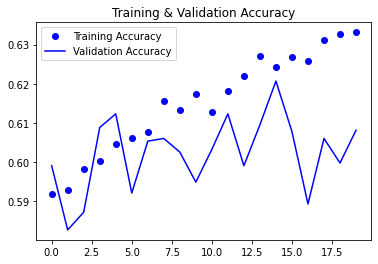

In [117]:
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

> For Loss

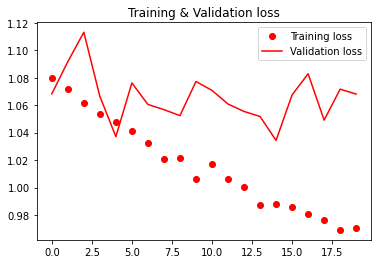

In [118]:
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training & Validation loss')
plt.legend()

# THE END